THE EMPLOYEE PERFORMANCE

INTRODUCTION

The Employee Performance Dataset consists of 10,000 entries with 15 attributes capturing demographic, professional, and performance-related factors. It provides a comprehensive overview of workforce characteristics within an organization, enabling a data-driven approach to human resource management and employee development.

Demographics and Background

The average employee age is around 40 years, ranging from 21 to 59.

Employees belong to multiple departments such as IT, Finance, Sales, and Marketing, representing diverse job roles like Analysts, Engineers, and Managers.

Education levels range from High School to PhD, allowing comparison between education and performance.

Experience and Income Analysis

Employees have an average of 14 years of experience at the company.

The average monthly income is approximately ₹85,000, indicating a well-distributed pay scale across roles.

Senior employees with longer tenure and higher education levels generally earn more.

Performance and Satisfaction Insights

Performance scores average around 3.0 (on a scale of 1–5), suggesting balanced performance across departments.

Job satisfaction and work-life balance both average near 2.5, showing room for improvement in employee engagement and well-being.

Employees with more training hours often show higher performance scores, indicating a positive link between training and productivity.

Promotion and Attendance Trends

Only about 15% of employees received a promotion in the last five years.

The average number of absenteeism days is 15 days per year, highlighting potential attendance issues that might affect performance.

Key Insights for HR Decision-Making

The dataset helps HR professionals identify top performers and areas for improvement.

Predictive analytics can be applied to forecast promotion likelihood, attrition risk, or performance outcomes based on key features like experience, training, and satisfaction.

Insights from this data can assist in creating targeted employee development programs, work-life balance initiatives, and compensation strategies to improve organizational efficiency.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r"E:\Data_science\dataset\machine project data\employee_performance_dataset.csv")
print(df.shape)

(10000, 15)


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee_ID               10000 non-null  int64  
 1   Department                10000 non-null  object 
 2   Gender                    10000 non-null  object 
 3   Age                       10000 non-null  int64  
 4   Education_Level           10000 non-null  object 
 5   Years_at_Company          10000 non-null  int64  
 6   Job_Role                  10000 non-null  object 
 7   Monthly_Income            10000 non-null  float64
 8   Training_Hours            10000 non-null  int64  
 9   Overtime                  10000 non-null  object 
 10  Work_Life_Balance         10000 non-null  int64  
 11  Job_Satisfaction          10000 non-null  int64  
 12  Performance_Score         10000 non-null  int64  
 13  Absenteeism_Days          10000 non-null  int64  
 14  Promoti

In [28]:
print(df.isnull().sum())

Employee_ID                 0
Department                  0
Gender                      0
Age                         0
Education_Level             0
Years_at_Company            0
Job_Role                    0
Monthly_Income              0
Training_Hours              0
Overtime                    0
Work_Life_Balance           0
Job_Satisfaction            0
Performance_Score           0
Absenteeism_Days            0
Promotion_in_Last_5Years    0
dtype: int64


In [29]:
print(df.describe(include='all'))

        Employee_ID Department Gender           Age Education_Level  \
count   10000.00000      10000  10000  10000.000000           10000   
unique          NaN          6      2           NaN               4   
top             NaN         IT   Male           NaN          Master   
freq            NaN       1703   5064           NaN            2554   
mean     5000.50000        NaN    NaN     39.784000             NaN   
std      2886.89568        NaN    NaN     11.238958             NaN   
min         1.00000        NaN    NaN     21.000000             NaN   
25%      2500.75000        NaN    NaN     30.000000             NaN   
50%      5000.50000        NaN    NaN     39.000000             NaN   
75%      7500.25000        NaN    NaN     50.000000             NaN   
max     10000.00000        NaN    NaN     59.000000             NaN   

        Years_at_Company Job_Role  Monthly_Income  Training_Hours Overtime  \
count        10000.00000    10000    10000.000000    10000.000000    

In [30]:
target_candidates = [c for c in df.columns if c.lower() in ['performance','performance_rating','performance_score','rating','target','label','outcome','performancelevel','performance_level']]
if len(target_candidates)==0:
    low_card = [c for c in df.columns if df[c].nunique()<=20 and c.lower() not in ['id','employee_id','emp_id','name','employee','email','phone']]
    if len(low_card)>0:
        target_candidates = low_card
if len(target_candidates)==0:
    target_candidates = [df.columns[-1]]
target = target_candidates[0]
print('Auto-selected target column:', target)
X = df.drop(columns=[target])
y = df[target]

Auto-selected target column: Performance_Score


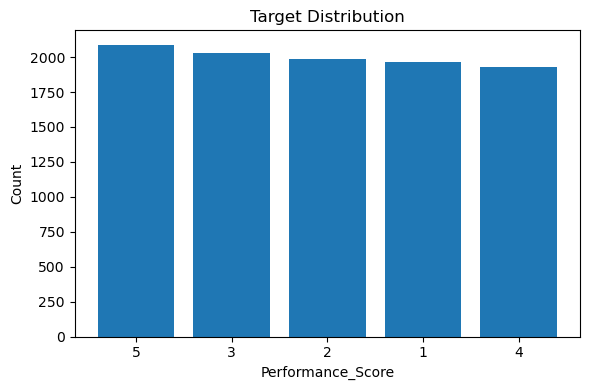

In [31]:
plt.figure(figsize=(6,4))
if y.dtype == 'O' or y.nunique()<=50:
    vals = y.value_counts(dropna=False)
    plt.bar(vals.index.astype(str), vals.values)
    plt.title('Target Distribution')
    plt.xlabel(str(target))
    plt.ylabel('Count')
else:
    plt.hist(y.dropna(), bins=30)
    plt.title('Target Distribution')
    plt.xlabel(str(target))
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

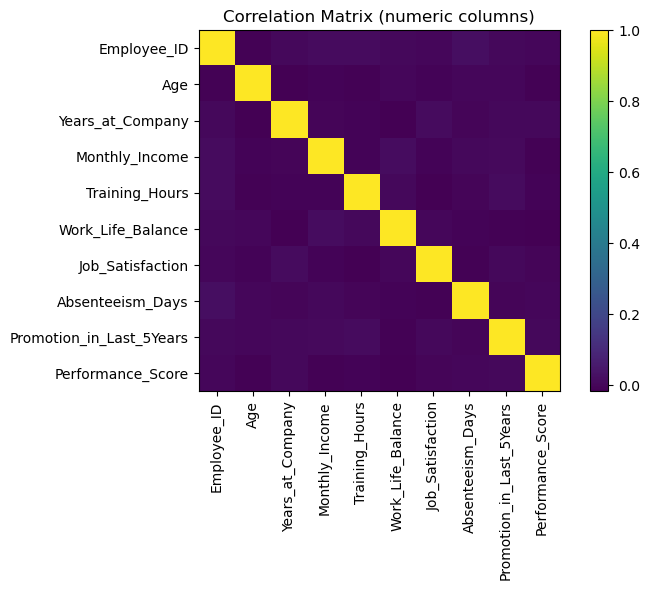

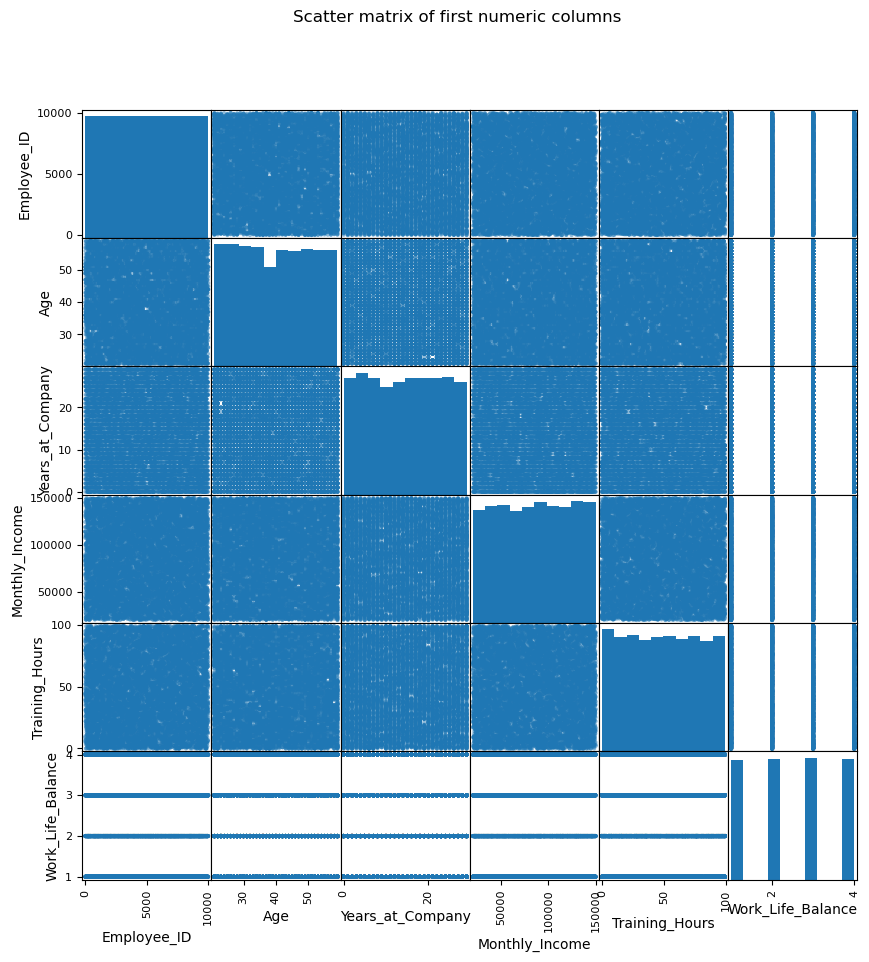

In [33]:
from pandas.plotting import scatter_matrix

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols)>1:
    plt.figure(figsize=(8,6))
    corr = df[num_cols+[target]].corr(numeric_only=True)
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title('Correlation Matrix (numeric columns)')
    plt.tight_layout()
    plt.show()
    sm_cols = num_cols[:6] if len(num_cols)>6 else num_cols
    if len(sm_cols)>0:
        scatter_matrix(df[sm_cols], figsize=(10,10))
        plt.suptitle('Scatter matrix of first numeric columns')
        plt.show()

for c in X.select_dtypes(include=['object','category']).columns:
    le=LabelEncoder()
    X[c]=X[c].astype(str)
    X[c]=le.fit_transform(X[c])
if y.dtype=='O' or y.dtype.name=='category':
    y = LabelEncoder().fit_transform(y.astype(str))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))


RandomForest

In [34]:
unique_vals = np.unique(y)
if y.dtype.kind in 'iuob' or (len(unique_vals)<=20):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model type: classification')
    print('Accuracy:', accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

Model type: classification
Accuracy: 0.1985
              precision    recall  f1-score   support

           1       0.21      0.22      0.22       405
           2       0.16      0.16      0.16       387
           3       0.18      0.21      0.20       404
           4       0.21      0.16      0.18       394
           5       0.23      0.24      0.24       410

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000



In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Model type: regression')
print('R2:', r2_score(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))

Model type: regression
R2: -0.02121746249030676
MSE: 2.0632960999999996


In [37]:
joblib.dump(model, 'employee_performance_model.pkl')

['employee_performance_model.pkl']

CONCLUSION

The Employee Performance dataset contains 10,000 records with 15 key attributes related to workforce demographics, experience, compensation, and performance metrics. The data shows that the average employee age is around 40 years, with approximately 14 years of company experience and an average monthly income of ₹85,000. Most employees report moderate job satisfaction and work-life balance (both averaging around 2.5 on a 1–4 scale).

The dataset provides valuable insights for analyzing relationships between factors such as training hours, income, promotions, and performance scores. It can be effectively used for HR analytics, predictive modeling of employee performance, and identifying trends to improve retention and productivity.